## Comparações com o salário mínimo

#### 1)  Importação das bibliotecas e upload da base

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

agregado_vinculos = pd.read_csv("dados/agregado_vinculo")

#### 2) Número de mulheres e homens abaixos do sm

In [4]:
trabalhadores_abaixo_sm = agregado_vinculos.loc[agregado_vinculos["valor_remun_media_sm"] < 1]
abaixo_sm_sexo_ano = trabalhadores_abaixo_sm.groupby(by=["ano", "sexo_trabalhador"])["numero_vinculos"].sum().unstack()
abaixo_sm_sexo_ano

sexo_trabalhador,1,2
ano,,
1999,80859,138458
2009,296183,441987
2019,764746,867889


#### 3) Número de mulheres e homens que ganham acima de 10 salários mínimos

In [3]:
trabalhadores_acima10_sm = agregado_vinculos.loc[agregado_vinculos["valor_remun_media_sm"] > 10]
acima10_sm_sexo = trabalhadores_acima10_sm.groupby(by=["ano", "sexo_trabalhador"])["numero_vinculos"].sum().unstack()
acima10_sm_sexo

sexo_trabalhador,1,2
ano,,
1999,1796599,837289
2009,1272846,594589
2019,1169865,569940


#### 4) Gráfico: Mulheres e Homens abaixo do Salário Mínimo

Text(0.5, 1.0, 'Mulheres e Homens abaixo do salário mínimo')

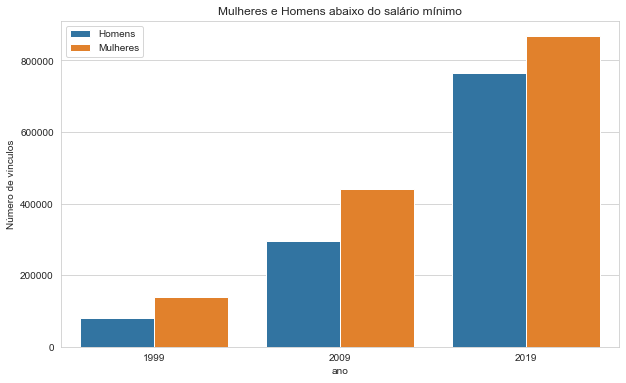

In [6]:
sns.set_style('whitegrid')
plt.figure(figsize=(10, 6))
plot_abaixo_sm = sns.barplot(x="ano",
                             y="numero_vinculos",
                             data=trabalhadores_abaixo_sm,
                             hue="sexo_trabalhador", estimator=np.sum, ci=None)
plt.legend(["Homens", "Mulheres"])
plt.ylabel("Número de vínculos")
plt.title("Mulheres e Homens abaixo do salário mínimo")

#### 5) Gráfico: Mulheres e Homens que ganham acima de 10 Salários Mínimos

Text(0.5, 1.0, 'Mulheres e Homens que ganham acima de 10 salários mínimos')

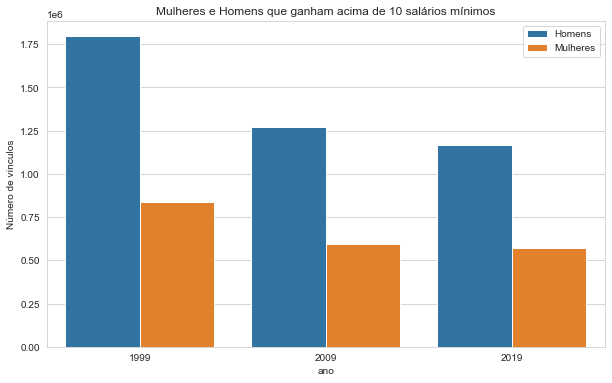

In [5]:
sns.set_style('whitegrid')
plt.figure(figsize=(10, 6))
plot_abaixo_sm = sns.barplot(x="ano",
                             y="numero_vinculos",
                             data=trabalhadores_acima10_sm,
                             hue="sexo_trabalhador", estimator=np.sum, ci=None)
plt.legend(["Homens", "Mulheres"])
plt.ylabel("Número de vínculos")
plt.title("Mulheres e Homens que ganham acima de 10 salários mínimos")

#### 3) Proporção mulheres e homens abaixo do salário mínimo:

In [10]:
num_abaixo_sm = trabalhadores_abaixo_sm.groupby("ano")["numero_vinculos"].sum()
num_acima10_sm = trabalhadores_acima10_sm.groupby("ano")["numero_vinculos"].sum()
propor_abaixo_sm = pd.concat([
    (abaixo_sm_sexo_ano[1]/num_abaixo_sm)*100,
    (abaixo_sm_sexo_ano[2]/num_abaixo_sm)*100,
    (acima10_sm_sexo[1]/num_acima10_sm)*100,
    (acima10_sm_sexo[2]/num_acima10_sm)*100,
], axis=1)

propor_abaixo_sm.columns = ["Homens abaixo do sm (%)", "Mulheres abaixo do sm (%)", "Homens acima de 10 sm (%)", "Mulheres acima de 10 sm (%)"]
propor_abaixo_sm 

,Homens abaixo do sm (%),Mulheres abaixo do sm (%),Homens acima de 10 sm (%),Mulheres acima de 10 sm (%)
ano,,,,
1999,36.868551,63.131449,68.210911,31.789089
2009,40.123955,59.876045,68.160123,31.839877
2019,46.841211,53.158789,67.241156,32.758844
